In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

In [30]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [31]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requiremnets.txt'


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ashak/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-27 Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2578.5ms pre-process, 123.2ms inference, 379.6ms NMS per image at shape (1, 3, 384, 640)


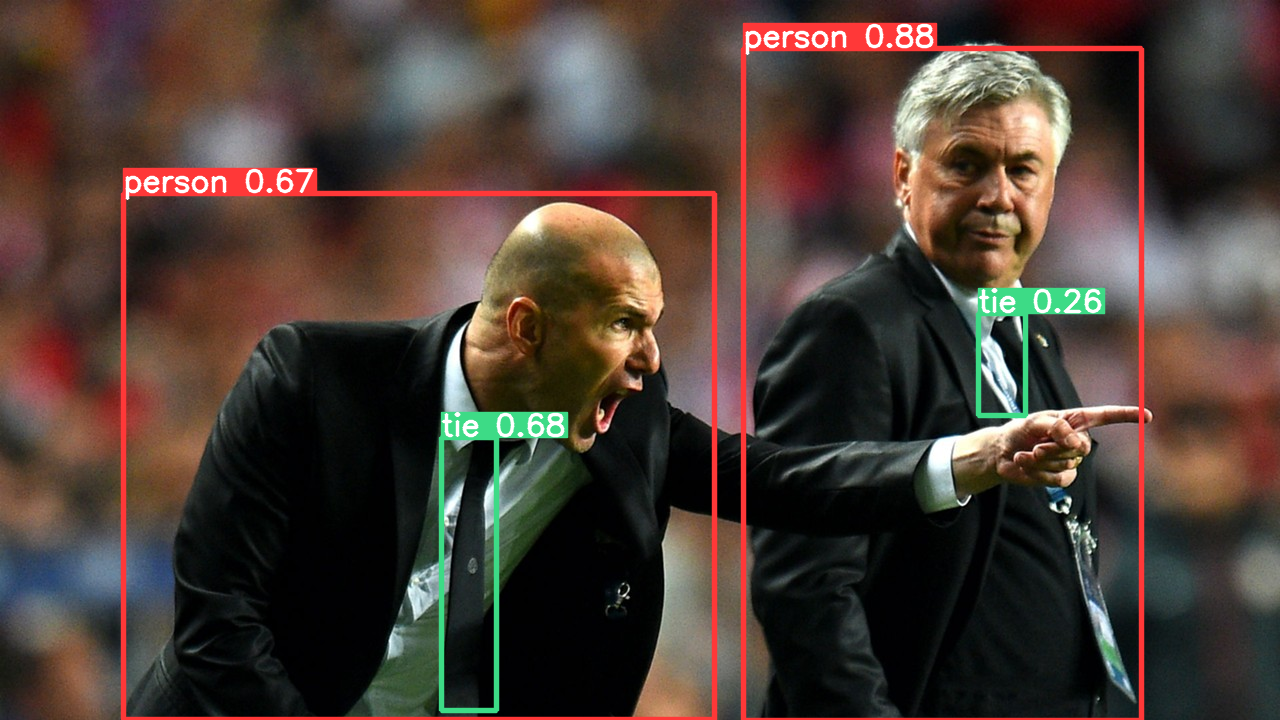

In [6]:
results.show()

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import uuid
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake' , 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [2]:
!pip install pyqt5 lxml
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [7]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [2]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 2 --data custom.yml --weights yolov5s.pt --workers 2 

train: weights=yolov5s.pt, cfg=, data=custom.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\ashak\Downloads\Drowsiness': No such file or directory
YOLOv5  2023-11-27 Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0,

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp11/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ashak/.cache\torch\hub\master.zip
YOLOv5  2023-11-28 Python-3.11.5 torch-2.1.1 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'IMG-20231012-WA0041.jpg')

In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 1600x900 2 drowsys
Speed: 31.0ms pre-process, 62.9ms inference, 292.8ms NMS per image at shape (1, 3, 640, 384)


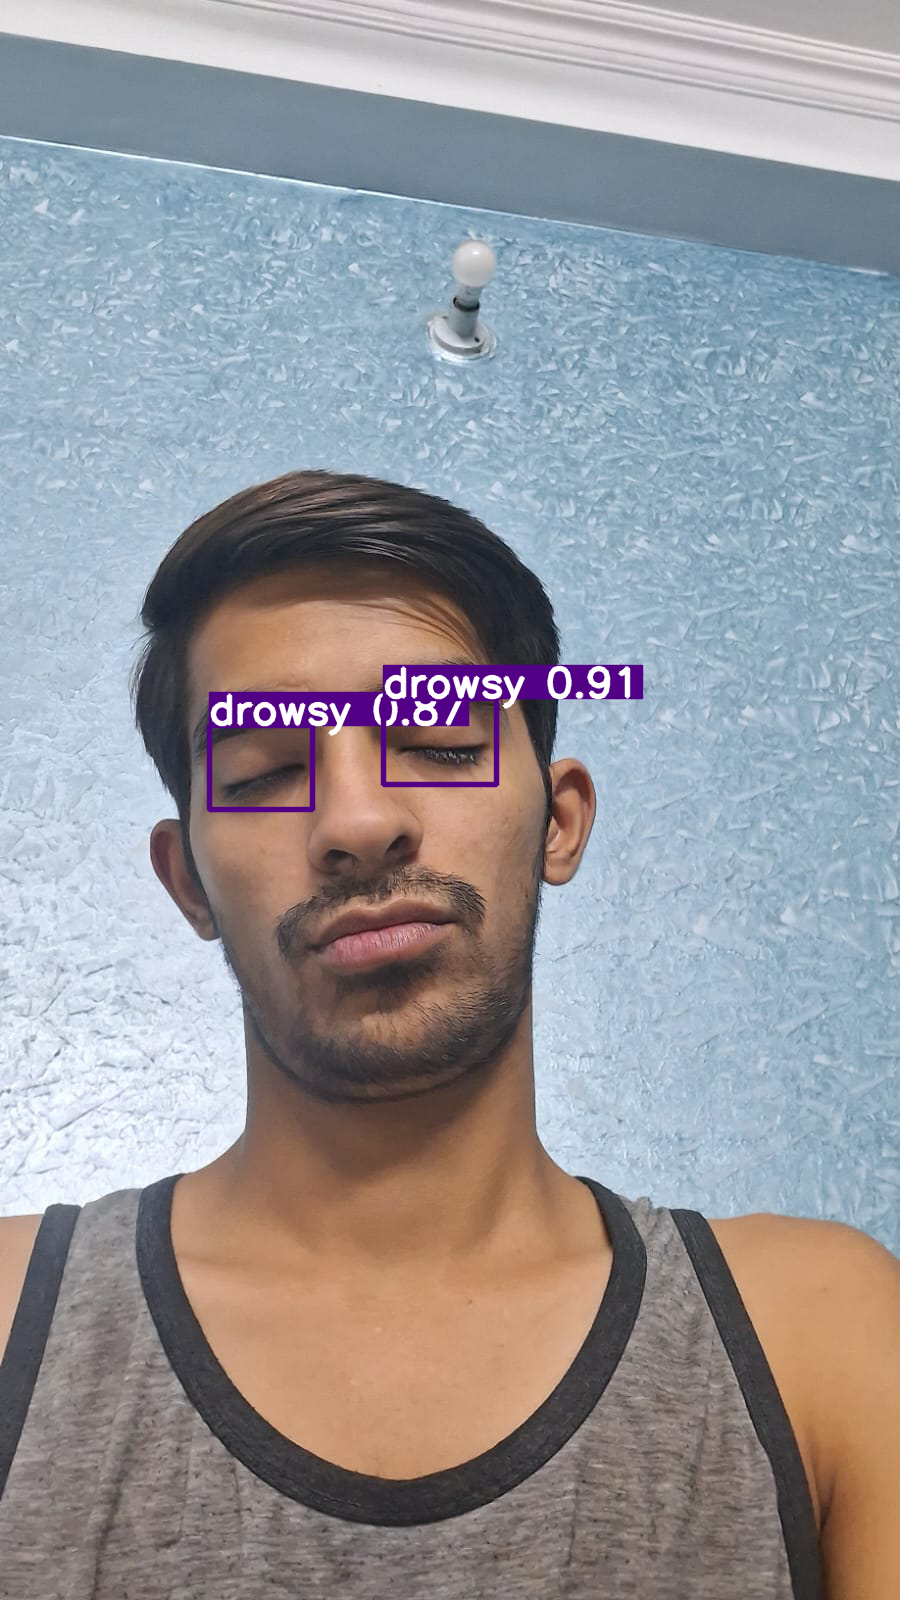

In [14]:
results.show()

In [29]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()